In [ ]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from tqdm import tqdm
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat
from lib.datasets.mnist_fid import evaluate_fid_score
def categorical_log_likelihood(x, logits):
    """Log likelihood of a discretized Gaussian specialized for image data.

    Assumes data `x` consists of integers [0, num_classes-1].

    Args:
    x: where to evaluate the distribution. shape = (bs, ...), dtype=int32/int64
    logits: logits, shape = (bs, ..., num_classes)

    Returns:
    log likelihoods
    """
    pass
    #log_probs = nn.log_softmax(logits)
    #x_onehot = nn.one_hot(x, logits.shape[-1])
    #return torch.sum(log_probs * x_onehot, axis=-1)

In [ ]:


path = "SavedModels/MNIST/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2023-12-25"  # 2
config_name = "config_001_unet14Mlogits.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_599999_unet14Mlogits.pt"


path = "SavedModels/MNISTHollow/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2024-02-19"  # 2
config_name = "config_001_crmnll_001.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_524999_crmnll_001.pt"

path = "SavedModels/MNISTHollow/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2024-02-07"  # 2
config_name = "config_001_hollow.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_539999_hollow.pt"


path = "SavedModels/MNIST/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2024-01-29"  # 2
config_name = "config_001_unetnll.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_599999_unetnll.pt"

path = "SavedModels/MNISTHollow/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2024-02-07"  # 2
config_name = "config_001_hollow_direct.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_519999_hollow_direct.pt"

path = "SavedModels/MNIST/"  # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = "2023-12-25"  # 2
config_name = "config_001_unet14Mlogits.yaml"  # config_001_hollowMLEProb.yaml
model_name = "model_599999_unet14Mlogits.pt"

dataset_location = "lib/datasets"

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)

cfg = bookkeeping.load_config(config_path)
cfg.data.train = False
"""
if cfg.loss.name == 'CatRM':
    cfg.loss.name = 'SDDMNLL'
elif cfg.loss.name == 'CTElbo':
    cfg.loss.name = 'TauLDRNLL'
else:
    raise KeyError("Eval not defined!")

cfg.training.train_step_name = 'EvalMNIST'
"""
device = torch.device(cfg.device)

model = model_utils.create_model(cfg, device)

optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}

state = bookkeeping.load_state(state, checkpoint_path)
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'TauL' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.0)
cfg.sampler.num_steps = 1000
cfg.sampler.is_ordinal = True

sampler = sampling_utils.get_sampler(cfg)


print("Info:")
print("--------------------------------")
print("State Iter:", state["n_iter"])
print("--------------------------------")
print("Name Dataset:", cfg.data.name)
print("Loss Name:", cfg.loss.name)

print("--------------------------------")
print("Model Name:", cfg.model.name)
print("Number of Parameters: ", sum([p.numel() for p in model.parameters()]))

model.eval()
# 66.52994572680203  # Inception mean:  7.715643802044586
# Inception std:  0.18737017997662175

In [ ]:
import torch
import torchvision.models as models

# Stellen Sie sicher, dass CUDA verfügbar ist
if torch.cuda.is_available():
    device = torch.device("cuda")
    
    # Initialisieren Sie ein Beispielmodell und laden Sie es auf die GPU

    
    # Berechnen und drucken Sie den Speicherverbrauch
    allocated_memory = torch.cuda.memory_allocated(device) / (1024**2) # Konvertiere Bytes in MiB
    print(f"Memory Allocated for the Model: {allocated_memory:.2f} MiB")
else:
    print("CUDA is not available. Check your PyTorch or GPU settings.")
# 268.99 MiB

In [ ]:
n_samples = 49
samples, changes= sampler.sample(model, n_samples)
saved_samples = samples

In [ ]:
np.save(f'mnist_hollow_direct_crm.npy', samples)
n_samples = 7 * 7
s_name = f'mnist_hollow_direct_crm.npy'
#s_name = 'Samples/MNIST/mnist_hollow_crmnll_TauL1000.npy' # Samples/MNIST/
samples = np.load(s_name)
#samples = samples[550:]
samples = samples.reshape(-1, 1, 28, 28)
#saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
fig = plt.figure(figsize=(7, 7)) 
plt.subplots_adjust(wspace=0.00, hspace=0.00)
int(np.sqrt(n_samples))
for i in range(n_samples):
    plt.subplot(int(7), int(7), 1 + i)
    plt.axis("off")
    plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")

plt.tight_layout()  
plt.savefig('mnist_hollow_direct_crm.pdf', transparent=True)
plt.show()
plt.close()

In [ ]:

steps = [1000]
sampler_name = ['ExactSampling']# , CRMTauL']
for sampler_n_i in sampler_name:
    for step in steps:
        data_list = []
        for i in range(102):
            print(i)
            print(f'nist_hollow_crmnll{sampler_n_i}{step}_{i}.npy')
            print(np.load(f'mnist_hollow_crmnll_{sampler_n_i}{step}_{i}.npy').shape)
            data_list.append(np.load(f'mnist_hollow_crmnll_{sampler_n_i}{step}_{i}.npy'))
        data = np.vstack(data_list)
        print(data.shape)
        np.save(f'Samples/MNIST/mnist_hollow_crmnll_{sampler_n_i}{step}.npy', data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4

# FID
steps_plot = np.round(1 / np.array([5, 10, 20, 50, 100, 250, 500, 1000, 2000]), 4)
steps = 1 / np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000, 1500])
fid_taul = np.array([369.82769160402194, 339.7123739152373, 283.87526811768316, 212.90508021598973, 120.04226304249106, 40.6234648618652, 13.453524786963495, 3.6, 2.98404509903506, 2.5895556730263706, 2.51, 2.48, 2.460157370950734])
fid_lbjf = np.array([369.82769160402194, 368.6921461974128, 367.43394813969206, 363.92216793023744, 360.795573791034, 354.6901690476625, 339.59518918406286, 305.2288604477556, 212.0276736955564, 75.84530505097865, 32.956622302615955, 19.817409823054646, 7.19])
fid_mpl = np.array([344.39284875166595, 290.45552043389864, 247.32958569058357, 88.0448768470724, 42.82853224434638, 12.394969584434108, 4.020041973904654, 3.3680633408595213, 2.8853011388733307, 2.5683849558007807, 2.5, 2.4493237174940248, 2.40])

fig = plt.figure(figsize=(width, height))
plt.plot(steps, fid_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(steps, fid_lbjf, marker='o', label='Euler', markersize=marker_size, linewidth=line_width)
plt.plot(steps, fid_mpl, marker='o', label='MP Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
plt.xlabel('$\\tau$', fontsize=13)
plt.ylabel('FID $\\downarrow$', fontsize=13)
plt.title('FID of Sampling Methods for Varying $\\tau$', fontsize=14)
plt.legend(fontsize=9)
plt.grid(True)
plt.xscale('log')
steps_y = [370, 250, 150, 100, 45, 30, 20, 7.0, 4.0, 2.5]
plt.yscale('log')
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
#plt.tight_layout()  # Fügt diese Zeile hinzu, um den Rahmen näher an das x-Label zu bringen
plt.savefig('fid_tau.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('$\\tau$', fontsize=13)], pad_inches=0.03)
plt.show()

In [ ]:
# IS 
import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4

steps_plot = np.round(1 / np.array([5, 10, 20, 50, 100, 250, 500, 1000, 2000]), 4)
mean_is_mpl = np.array([8.56, 8.62, 8.677, 8.7, 8.733, 8.763])
std_is_mpl = np.array([0.078, 0.1, 0.079, 0.06, 0.057, 0.075])
# 30-60, 50-100, 100-200, 250-500, 500-1000, 750, 1500

steps = 1 / np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000, 1500])
print(len(steps))
mean_is_taul = np.array([2.19, 2.22, 2.708047858197907, 3.86, 4.946, 6.260149524787618, 7.725075911310337, 8.600311295819452, 8.695352062102907, 8.730387442552915, 8.76098102664333, 8.785004667417176, 8.789941441541984])
std_is_taul = np.array([0.029, 0.027, 0.035763717879784655, 0.07, 0.09223751449123928, 0.05542292679137494, 0.07471893518876059, 0.11749863261977536, 0.05961257597104094, 0.057613531976108634, 0.06736065870254852, 0.07408158674264428, 0.07343111567356189])

mean_is_lbjf = np.array([2.197, 2.1935, 2.1905016592910244, 2.21, 2.233561128867508, 2.2720786975418426, 2.3474579482515194, 2.703195286772994, 4.422914663421897, 6.212356745289218, 7.003172870037281, 7.3776977749287855, 8.086100926383237])
std_is_lbjf = np.array([0.017, 0.028, 0.016885548328526935, 0.023, 0.01655479275116797, 0.01665546477191724, 0.021260056132834024, 0.042065063979126655, 0.0653358704449712, 0.08250910888402853, 0.09807975265868278, 0.11617335996188316, 0.07638698691732632])

mean_is_mpl = np.array([2.44, 3.01, 3.92, 5.575, 6.35, 7.779, 8.56, 8.65, 8.7, 8.745, 8.763, 8.795, 8.8])
std_is_mpl = np.array([0.019, 0.0633, 0.046, 0.0665, 0.0776, 0.087, 0.078, 0.1, 0.079, 0.06, 0.075, 0.082, 0.072])
print(len(mean_is_mpl), len(mean_is_taul), len(mean_is_lbjf), len(std_is_mpl), len(std_is_taul), len(std_is_lbjf))


fig = plt.figure(figsize=(width, height))
plt.plot(steps, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
#plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_taul, std_is_taul)],[mean + std for mean, std in zip(mean_is_taul, std_is_taul)],alpha=0.3, color='green')
plt.plot(steps, mean_is_lbjf, marker='o', label='Euler', markersize=marker_size, linewidth=line_width)
#plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_lbjf, std_is_lbjf)],[mean + std for mean, std in zip(mean_is_lbjf, std_is_lbjf)],alpha=0.3)

plt.plot(steps, mean_is_mpl, marker='o', label='MP Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
#plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_mpl, std_is_mpl)],[mean + std for mean, std in zip(mean_is_mpl, std_is_mpl)],alpha=0.3)

plt.xlabel('$\\tau$', fontsize=13)
plt.ylabel('IS $\\uparrow$', fontsize=13)
plt.title('IS of Sampling Methods for Varying $\\tau$', fontsize=14)
plt.legend(fontsize=9)
plt.grid(True)
plt.xscale('log')
#plt.yscale('log')

steps_y = [8.8, 8.0,7.0,6.0,5.0,4.0,3.0,2.0]
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
plt.savefig('inception_score_tau.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('$\\tau$', fontsize=13)], pad_inches=0.03)
plt.show()



In [ ]:
# NFE FID

import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4

nfe_mpl = [100, 200, 500, 1000, 1250, 1500]
nfe_taul = [100, 250, 500, 750, 1000, 1250, 1500]

# steps = 1 / np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000, 2000])
nfe_mpl = [100, 200, 500, 1000, 1250, 1500]
nfe_taul = [100, 250, 500, 750, 1000, 1250, 1500]
fid_taul = np.array([3.6, 2.98404509903506, 2.5895556730263706, 2.51, 2.48, 2.47, 2.460157370950734])
fid_mpl = np.array([4.020041973904654, 3.3680633408595213, 2.8853011388733307, 2.5683849558007807, 2.52, 2.5])


nfe_taul_5100 = [10, 20, 30, 50, 100]# , 250, 500, 750, 1000, 1500], 2.98404509903506, 2.5395556730263706, 2.51, 2.48, 2.460157370950734])
nfe_mpl_5100 = [10, 20, 30, 40, 60, 100]#, 200, 500, 1000, 1500]
fid_taul_5100 = np.array([283.87526811768316, 120.04226304249106, 40.6234648618652, 13.453524786963495, 3.6]) # 2.98404509903506, 2.5895556730263706, 2.51, 2.48, 2.460157370950734])
fid_mpl_5100 = np.array([344.39284875166595, 247.32958569058357, 88.0448768470724, 42.82853224434638, 12.394969584434108, 4.020041973904654]) #3.3680633408595213, 2.8853011388733307, 2.5683849558007807, 2.5])


#steps_plot = 
fig = plt.figure(figsize=(width, height))
plt.plot(nfe_taul, fid_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(nfe_mpl, fid_mpl, marker='o', label='Midpoint Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
#plt.plot(nfe_1_01, nfe_1_01_fid, marker='o', label='Tau-Leaping C1')
#plt.plot(nfe_3_01, nfe_3_01_fid, marker='o', label='Tau-Leaping C3')
#plt.plot(nfe_5_01, nfe_5_01_fid, marker='o', label='Tau-Leaping C5')
#plt.plot(nfe_10_01, nfe_10_01_fid, marker='o', label='Tau-Leaping C10')

steps_y = [4.0, 3.6, 3.4, 3.0, 2.8, 2.57, 2.46]
steps_plot = [100, 250, 500, 750, 1000, 1250, 1500]
plt.xlabel('NFE', fontsize=13)
plt.ylabel('FID $\downarrow$', fontsize=13)
plt.title('FID of Tau-Leaping Methods for Varying NFE', fontsize=14)
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
#
plt.savefig('fid_nfe_mp_taul_10100.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('NFE', fontsize=13)], pad_inches=0.03)
plt.show()

#steps_plot = 
fig = plt.figure(figsize=(width, height))
plt.plot(nfe_taul_5100, fid_taul_5100, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(nfe_mpl_5100, fid_mpl_5100, marker='o', label='Midpoint Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
#plt.plot(nfe_1_01, nfe_1_01_fid, marker='o', label='Tau-Leaping C1')
#plt.plot(nfe_3_01, nfe_3_01_fid, marker='o', label='Tau-Leaping C3')
#plt.plot(nfe_5_01, nfe_5_01_fid, marker='o', label='Tau-Leaping C5')
#plt.plot(nfe_10_01, nfe_10_01_fid, marker='o', label='Tau-Leaping C10')
plt.xlabel('NFE', fontsize=13)
plt.ylabel('FID $\downarrow$', fontsize=13)
plt.title('FID of Tau-Leaping Methods for Varying NFE', fontsize=14)
plt.legend()
plt.grid(True)
plt.yscale('log')
steps_y_5100 = [345, 245, 125, 40, 14, 3.5]
steps_plot_5100 = [10, 15, 20, 30, 50, 100]
plt.yticks(steps_y_5100, steps_y_5100)
plt.xticks(steps_plot_5100, steps_plot_5100)
#
plt.savefig('fid_nfe_mp_taul_1001500.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('NFE', fontsize=13)], pad_inches=0.03)
plt.show()


In [ ]:
# NFE IS
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4
mean_is_taul = np.array([8.600311295819452, 8.695352062102907, 8.730387442552915, 8.76098102664333, 8.785004667417176, 8.787, 8.789941441541984])
std_is_taul = np.array([0.11749863261977536, 0.05961257597104094, 0.057613531976108634, 0.06736065870254852, 0.07408158674264428, 0.056, 0.07343111567356189])

mean_is_mpl = np.array([8.56, 8.65, 8.7, 8.745, 8.753, 8.763])
std_is_mpl = np.array([0.078, 0.1, 0.079, 0.06, 0.057, 0.075])
#50-100, 100-200, 250-500, 500-1000, 750, 1500

steps = 1 / np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000, 1500])

nfe_mpl = [100, 200, 500, 1000, 1250, 1500]
nfe_taul = [100, 250, 500, 750, 1000, 1250, 1500]

fig = plt.figure(figsize=(width, height))
plt.plot(nfe_taul, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
#plt.fill_between(nfe_taul, [mean - std for mean, std in zip(mean_is_taul, std_is_taul)],[mean + std for mean, std in zip(mean_is_taul, std_is_taul)],alpha=0.3, color='green')

plt.plot(nfe_mpl, mean_is_mpl, marker='o', label='Midpoint Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
#plt.fill_between(nfe_mpl, [mean - std for mean, std in zip(mean_is_mpl, std_is_mpl)],[mean + std for mean, std in zip(mean_is_mpl, std_is_mpl)],alpha=0.3)
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

plt.xlabel('NFE', fontsize=13)
plt.ylabel('IS $\\uparrow$', fontsize=13)
plt.title('IS of Tau-Leaping Methods for Varying NFE', fontsize=14)
plt.legend()
plt.grid(True)
steps_plot = [100, 250, 500, 750, 1000, 1250, 1500]
steps_y = [8.56, 8.6,8.65, 8.70, 8.73, 8.76, 8.79]
#plt.yscale('log')
plt.xticks(steps_plot, steps_plot)
plt.yticks(steps_y, ['%.2f' % val for val in steps_y])
plt.savefig('inception_score_mp_tau_1001500.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('NFE', fontsize=13)], pad_inches=0.03)
plt.show()

steps_taul = [10, 20, 30, 50, 100]
print(len(steps))
mean_is_taul = np.array([2.708047858197907, 4.946, 6.260149524787618, 7.725075911310337, 8.600311295819452])
std_is_taul = np.array([0.035763717879784655, 0.09223751449123928, 0.05542292679137494, 0.07471893518876059, 0.11749863261977536])
# 10, 20, 
mean_is_mpl = np.array([2.44, 3.92, 5.575, 6.35, 7.779, 8.56])
std_is_mpl = np.array([0.019, 0.046, 0.0665, 0.0776, 0.087, 0.078])
# 10, 20, 30, 40, 60, 100
steps_mptaul = [10, 20, 30, 40, 60, 100]

fig = plt.figure(figsize=(width, height))
plt.plot(steps_taul, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
#plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_taul, std_is_taul)], [mean + std for mean, std in zip(mean_is_taul, std_is_taul)], alpha=0.3, color='green')

plt.plot(steps_mptaul, mean_is_mpl, marker='o', label='Midpoint Tau-Leaping', color='lightcoral', markersize=marker_size, linewidth=line_width)
#plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_mpl, std_is_mpl)],[mean + std for mean, std in zip(mean_is_mpl, std_is_mpl)], alpha=0.3)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('IS $\\uparrow$', fontsize=13)
plt.title('IS of Tau-Leaping Methods for Varying NFE', fontsize=14)
plt.legend()
plt.grid(True)
steps_plot = [10, 20, 30, 40, 50, 60, 100]
steps_y = [2.4, 4.0, 5.0, 6.3, 7.5, 8.5]
#plt.yscale('log')
plt.xticks(steps_plot, steps_plot)
plt.yticks(steps_y, steps_y)
#plt.savefig('inception_score_mp_tau_10100.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('NFE', fontsize=13)], pad_inches=0.03)
plt.show()

In [ ]:
c1 = [4, 9, 18, 27, 45, 66, 91, 100, 229, 250, 458, 500, 750, 1000]
pc_1_steps = [5, 10, 20, 30, 50, 72, 100, 110, 250, 273, 500, 546, 819, 1091]
c1_mean = [2.1392253129419734, 2.484887758015348, 4.249700637605696, 5.901981420547874, 7.466981407826634, 8.295146914515879, 8.551459235334269, 8.647939466433439, 8.78408936903131, 8.755318814855267, 8.804611169915592, 8.728635327016125, 8.769999551759987, 8.776702214194092]

c3 = [7, 14, 23, 38, 50, 57, 78, 100, 250, 392, 500, 750, 1000]
pc_3_steps = [10, 20, 32, 50, 65, 75, 102, 130, 319, 500, 638, 957, 1273]
c3_mean = [2.1205255078385172, 3.2648251573616394, 5.3502960082398925, 6.965370845442807, 7.762886743437322, 7.969269831063002, 8.4839056367083, 8.596458341030935, 8.782954059876383, 8.723618359852292, 8.751792345723775, 8.76805730506273, 8.596458341030935]

c5 = [10, 20, 33, 50, 67, 100, 170, 250, 342, 500, 750, 1000]
pc_5_steps = [15, 30, 48, 75, 102, 150, 250, 365, 502, 730, 1095, 1455]
c5_mean = [2.771391167490708, 4.854019294522539, 6.615730737167351, 7.719475046914932, 8.241109492920778, 8.659614704761324, 8.803900713753544, 8.795426848297684, 8.800822921343965, 8.721246193397805, 8.74803374634143, 8.744422635144518]

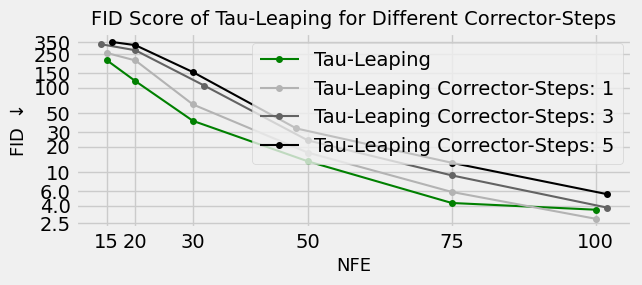

In [23]:
# 0: 75:  4.3245049017693304
# 1: 250, 500: [5.845140920974131, 2.252598541276768, 2.3627632134412977]
# 3: 250, 500, [9.18351245256298 2.3423048205916643, [[2.3001590957738642]]
# 5: 75, 250, 500, [12.95, 2.3731947632869037, 2.418666817264665]

# 5: 10, 16, 22, 25, 30, 48, 75, 102
# 3: 10, 14, 20, 32, 50, 75, 102
# 1: 10, 15, 20, 30, 50, 

# 100-1500
import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4
"""
pc_1_steps =[5, 10, 20, 30, 50, 100, 818]#, 1000, 1250, 1500]
nfe_01_1_fid = [355.30401756086303, 299.8788404145761, 220.94562240586495, 63.526149427266375, 17.06536557569376, 2.813092226544086, 2.27897546009885]#8, 2.2671159746989906, 2.259, 2.252]
pc_3_steps = [10, 20, 32, 50, 102, 637]#7, 1000, 1250, 1500]
nfe_01_3_fid = [368.2020780292752, 306.44852994200113, 105.99785122999572, 23.8096318610784, 3.8135712497214342, 2.276187915395326]#, 2.2539787186312788, 2.2466063307386435, 2.238]
pc_5_steps =[15, 30, 48, 102, 729]#, 1000, 1250, 1500]
nfe_01_5_fid = [308.4621460802384, 153.52888664861723, 32.976239962089096, 5.501552200792844, 2.2559381898192896]#, 2.2450412804101074, 2.234, 2.2267139529323856]
"""
# 1: 250, 500: [2.252598541276768, 2.3627632134412977]
# 3: [2.3423048205916643, [3.9064362368672505]

pc_1_steps =[15, 20, 30, 50, 75, 100, 250]
nfe_01_1_fid = [258.788404145761, 210.94562240586495, 63.526149427266375, 17.06536557569376, 5.845140920974131, 2.813092226544086, 2.3627632134412977]
pc_3_steps = [14, 20, 32, 50, 75, 102, 250]
nfe_01_3_fid = [328.2020780292752, 278.44852994200113, 105.99785122999572, 23.8096318610784, 9.18351245256298, 3.8135712497214342, 2.3923048205916643]
pc_5_steps =[16, 20, 30, 48, 75, 102, 250]
nfe_01_5_fid = [348.4621460802384, 320, 153.52888664861723, 32.976239962089096, 12.95, 5.501552200792844, 2.418666817264665]

steps = np.array([15, 20, 30, 50, 75, 100, 250]) # , 250, 500, 750, 1000, 1500])
fid_taul = np.array([212.90508021598973, 120.04226304249106, 40.6234648618652, 13.453524786963495, 4.3245049017693304, 3.6, 2.98404509903506])#, 2.98404509903506, 2.5895556730263706, 2.51, 2.48, 2.460157370950734])

steps = steps[:-1]
pc_1_steps = pc_1_steps[:-1]
pc_3_steps = pc_3_steps[:-1]
pc_5_steps = pc_5_steps[:-1]
fid_taul = fid_taul[:-1]
nfe_01_1_fid = nfe_01_1_fid[:-1]
nfe_01_3_fid = nfe_01_3_fid[:-1]
nfe_01_5_fid = nfe_01_5_fid[:-1]
colors = ['black', 'gray', 'lightgray']
colors = ['black', 'gray', (0.7, 0.7, 0.7)]  
colors = ['black', (0.39, 0.39, 0.39), (0.7, 0.7, 0.7)]  # Graustufen-Farben

fig = plt.figure(figsize=(width, height))
plt.plot(steps, fid_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(pc_1_steps, nfe_01_1_fid, marker='o', label='Tau-Leaping Corrector-Steps: 1', color=colors[2], markersize=marker_size, linewidth=line_width)
plt.plot(pc_3_steps, nfe_01_3_fid, marker='o', label='Tau-Leaping Corrector-Steps: 3', color=colors[1], markersize=marker_size, linewidth=line_width)
plt.plot(pc_5_steps, nfe_01_5_fid, marker='o', label='Tau-Leaping Corrector-Steps: 5', color=colors[0], markersize=marker_size, linewidth=line_width)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('FID $\downarrow$', fontsize=13)
plt.title('FID Score of Tau-Leaping for Different Corrector-Steps', fontsize=14)
plt.legend()
plt.grid(True)

plt.yscale('log')
steps_y = [350, 250, 150, 100, 50, 30, 20, 10, 6.0, 4.0, 2.5]
steps_plot = [15, 20, 30, 50, 75, 100]
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
#plt.savefig('fid_nfe_corrector_15100.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()

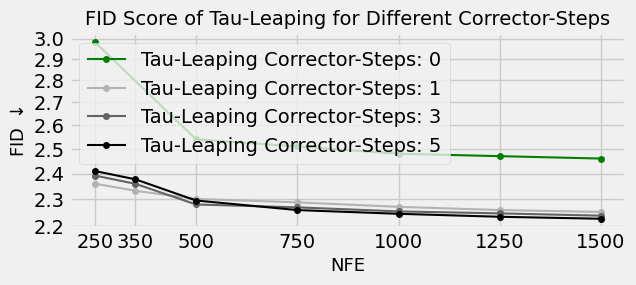

In [24]:
#plt.plot(nfe_mpl, fid_mpl, marker='o', label='Midpoint Tau-Leaping')
import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4

# 0: 75:  4.3245049017693304
# 1: 250, 500: [5.845140920974131, 2.252598541276768, 2.3627632134412977]
# 3: 250, 500, [9.18351245256298 2.3423048205916643, [[2.3001590957738642]]
# 5: 75, 250, 500, [12.95, 2.3731947632869037, 2.418666817264665]

colors = ['black', 'gray', 'lightgray']
colors = ['black', 'gray', (0.7, 0.7, 0.7)]  
colors = ['black', (0.39, 0.39, 0.39), (0.7, 0.7, 0.7)]  # Graustufen-Farben
fid_taul2 = np.array([2.98404509903506, 2.5395556730263706, 2.51, 2.48, 2.47, 2.460157370950734])
nfe_taul2 = [250, 500, 750, 1000, 1250, 1500]

nfe_1_01 = [250, 350, 500, 750, 1000, 1250, 1500] # 1090 last
nfe_1_01_fid = [2.36, 2.3324636154390714,  2.301, 2.288, 2.2711159746989906, 2.259, 2.252]
nfe_3_01 = [250, 350, 500, 750, 1000, 1250, 1500] # vorletzes 956 # 1272
nfe_3_01_fid = [2.392, 2.35941289542929, 2.28, 2.269187915395326, 2.2539787186312788, 2.2466063307386435, 2.238]
nfe_5_01 = [250, 350, 500, 750, 1000, 1250, 1500] #vorletztes 1094 letztes 15000
nfe_5_01_fid = [2.41, 2.3770141451028314, 2.295, 2.2589381898192896, 2.2450412804101074, 2.234, 2.2267139529323856]

nfe_taul2 = nfe_taul2

fig = plt.figure(figsize=(width, height))
plt.plot(nfe_taul2, fid_taul2, marker='o', color='green', label='Tau-Leaping Corrector-Steps: 0', markersize=marker_size, linewidth=line_width)
plt.plot(nfe_1_01, nfe_1_01_fid, marker='o', label='Tau-Leaping Corrector-Steps: 1', color=colors[2], markersize=marker_size, linewidth=line_width)
plt.plot(nfe_3_01, nfe_3_01_fid, marker='o', label='Tau-Leaping Corrector-Steps: 3', color=colors[1], markersize=marker_size, linewidth=line_width)
plt.plot(nfe_5_01, nfe_5_01_fid, marker='o', label='Tau-Leaping Corrector-Steps: 5', color=colors[0], markersize=marker_size, linewidth=line_width)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('FID $\downarrow$', fontsize=13)
plt.title('FID Score of Tau-Leaping for Different Corrector-Steps', fontsize=14)
plt.legend()
plt.grid(True)

plt.yscale('log')
steps_y = [3, 2.9, 2.8, 2.7, 2.65, 2.6, 2.54, 2.5, 2.4, 2.45, 2.30, 2.26, 2.23]
steps_y = [2.4, 2.375, 2.35, 2.325, 2.3, 2.275, 2.25, 2.24, 2.225]
steps_y = [3.0, 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2]
steps_plot = [250, 350, 500, 750, 1000, 1250, 1500]
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
#plt.savefig('fid_nfe_corrector_250500.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
max_t = 0.99999
min_t = 0.01
num_steps = [10, 20, 33, 50, 67, 100, 170, 250, 342, 500, 750, 1000]
nfe_10_01 = []
c_step = 5
for steps in num_steps:
    ts = np.concatenate(
        (np.
        linspace(max_t, min_t, steps), np.array([0]))
    )

    k = 0 
    for i, t in (enumerate(ts[0:-1])):
        #print(i+1)
        if t <= 0.1:
            for j in range(c_step):
                k += 1
                #print(k)

    nfe_10_01.append(i+1+k)
print(nfe_10_01)


In [ ]:
c1 = [4, 9, 18, 27, 45, 66, 91, 100, 229, 250, 458, 500, 750, 1000]
pc_1_steps = [5, 10, 20, 30, 50, 72, 100, 110, 250, 273, 500, 546, 819, 1091]
c1_mean = [2.1392253129419734, 2.484887758015348, 4.249700637605696, 5.901981420547874, 7.466981407826634, 8.295146914515879, 8.551459235334269, 8.647939466433439, 8.78408936903131, 8.755318814855267, 8.804611169915592, 8.728635327016125, 8.769999551759987, 8.776702214194092]

c3 = [7, 14, 23, 38, 50, 57, 78, 100, 250, 392, 500, 750, 1000]
pc_3_steps = [10, 20, 32, 50, 65, 75, 102, 130, 319, 500, 638, 957, 1273]
c3_mean = [2.1205255078385172, 3.2648251573616394, 5.3502960082398925, 6.965370845442807, 7.762886743437322, 7.969269831063002, 8.4839056367083, 8.596458341030935, 8.782954059876383, 8.723618359852292, 8.751792345723775, 8.76805730506273, 8.596458341030935]

c5 = [10, 20, 33, 50, 67, 100, 170, 250, 342, 500, 750, 1000]
pc_5_steps = [15, 30, 48, 75, 102, 150, 250, 365, 502, 730, 1095, 1455]
c5_mean = [2.771391167490708, 4.854019294522539, 6.615730737167351, 7.719475046914932, 8.241109492920778, 8.659614704761324, 8.803900713753544, 8.795426848297684, 8.800822921343965, 8.721246193397805, 8.74803374634143, 8.744422635144518]

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4
steps = np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000, 1500])
mean_is_taul = np.array([2.19, 2.22, 2.708047858197907, 3.86, 4.946, 6.260149524787618, 7.725075911310337, 8.600311295819452, 8.695352062102907, 8.730387442552915, 8.76098102664333, 8.785004667417176, 8.789941441541984])
#steps = np.array([15, 20, 30, 50, 75, 100, 250]) # , 250, 500, 750, 1000, 1500])

colors = ['black', 'gray', 'lightgray']
colors = ['black', 'gray', (0.7, 0.7, 0.7)]  
colors = ['black', (0.39, 0.39, 0.39), (0.7, 0.7, 0.7)]  # Graustufen-Farben

fig = plt.figure(figsize=(width, height))
plt.plot(steps, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(pc_1_steps, c1_mean, marker='o', label='Tau-Leaping Corrector-Steps: 1', color=colors[2], markersize=marker_size, linewidth=line_width)
plt.plot(pc_3_steps, c3_mean, marker='o', label='Tau-Leaping Corrector-Steps: 3', color=colors[1], markersize=marker_size, linewidth=line_width)
plt.plot(pc_5_steps, c5_mean, marker='o', label='Tau-Leaping Corrector-Steps: 5', color=colors[0], markersize=marker_size, linewidth=line_width)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('IS $\uparrow$', fontsize=13)
plt.title('IS of Tau-Leaping for Different Corrector-Steps', fontsize=14)
plt.legend()
plt.grid(True)

plt.yscale('log')
#steps_y = [350, 250, 150, 100, 50, 30, 20, 10, 6.0, 4.0, 2.5]
#steps_plot = [15, 20, 30, 50, 75, 100]
#plt.yticks(steps_y, steps_y)
#plt.xticks(steps_plot, steps_plot)
#plt.savefig('fid_nfe_corrector_15100.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4
steps = np.array([15, 20, 30, 50, 75, 100])#, 250, 500, 750, 1000, 1500])
mean_is_taul = np.array([3.86, 4.946, 6.260149524787618, 7.725075911310337, 8.3, 8.600311295819452])#, 8.695352062102907, 8.730387442552915, 8.76098102664333, 8.785004667417176, 8.789941441541984])

c1 = [4, 9, 18, 27, 45, 66, 91, 100, 229, 250, 458, 500, 750, 1000]
pc_1_steps = [15, 20, 30, 50, 72, 100]#, 110, 250, 273, 500, 546, 819, 1091]
c1_mean = [3.484887758015348, 4.249700637605696, 5.901981420547874, 7.466981407826634, 8.295146914515879, 8.551459235334269]#, 8.647939466433439, 8.78408936903131, 8.755318814855267, 8.804611169915592, 8.728635327016125, 8.769999551759987, 8.776702214194092]

c3 = [7, 14, 23, 38, 50, 57, 78, 100, 250, 392, 500, 750, 1000]
pc_3_steps = [15, 20, 32, 50, 75, 102]#, 130, 319, 500, 638, 957, 1273]
c3_mean = [2.9, 3.2648251573616394, 5.3502960082398925, 6.965370845442807, 7.969269831063002, 8.4839056367083]#, 8.596458341030935, 8.782954059876383, 8.723618359852292, 8.751792345723775, 8.76805730506273, 8.596458341030935]

c5 = [10, 20, 33, 50, 67, 100, 170, 250, 342, 500, 750, 1000]
pc_5_steps = [15, 20, 30, 48, 75, 102] #, 150, 250, 365, 502, 730, 1095, 1455]
c5_mean = [2.471391167490708, 3.0, 4.654019294522539, 6.615730737167351, 7.719475046914932, 8.241109492920778]

colors = ['black', 'gray', 'lightgray']
colors = ['black', 'gray', (0.7, 0.7, 0.7)]  
colors = ['black', (0.39, 0.39, 0.39), (0.7, 0.7, 0.7)]  # Graustufen-Farben

fig = plt.figure(figsize=(width, height))
plt.plot(steps, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(pc_1_steps, c1_mean, marker='o', label='Tau-Leaping Corrector-Steps: 1', color=colors[2], markersize=marker_size, linewidth=line_width)
plt.plot(pc_3_steps, c3_mean, marker='o', label='Tau-Leaping Corrector-Steps: 3', color=colors[1], markersize=marker_size, linewidth=line_width)
plt.plot(pc_5_steps, c5_mean, marker='o', label='Tau-Leaping Corrector-Steps: 5', color=colors[0], markersize=marker_size, linewidth=line_width)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('IS $\\uparrow$', fontsize=13)
plt.title('IS of Tau-Leaping for Different Corrector-Steps', fontsize=14)
plt.legend()
plt.grid(True)

plt.yscale('log')
steps_y = [2.45, 3, 4, 5, 6, 7, 8.5]
steps_plot = [15, 20, 30, 50, 75, 100]
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
plt.savefig('is_nfe_corrector_15100.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()

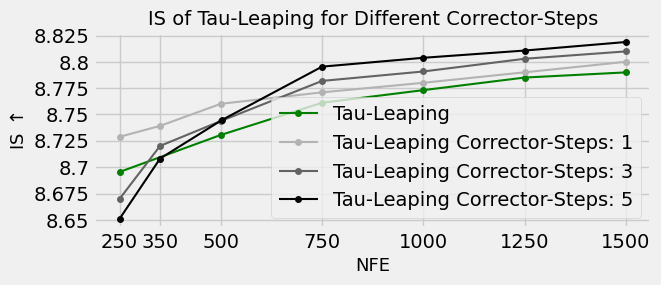

In [22]:

import numpy as np
import matplotlib.pyplot as plt
marker_size = 4
line_width = 1.5
width = 6.4
height= 2.4
steps = np.array([250, 500, 750, 1000, 1250, 1500])
mean_is_taul = np.array([8.695352062102907, 8.730387442552915, 8.76098102664333, 8.773, 8.785004667417176, 8.789941441541984])

c1 = [4, 9, 18, 27, 45, 66, 91, 100, 229, 250, 458, 500, 750, 1000]
pc_1_steps = [250, 350, 500, 750, 1000, 1250, 1500]
c1_mean = [8.728635327016125,8.739,  8.759999551759987, 8.7708936903131,  8.78, 8.79, 8.8000611169915592]

c3 = [7, 14, 23, 38, 50, 57, 78, 100, 250, 392, 500, 750, 1000]
pc_3_steps = [250, 350, 500, 750, 1000, 1250, 1500]
c3_mean = [8.67, 8.72,  8.743618359852292, 8.781792345723775, 8.790805730506273, 8.802954059876383, 8.81]
c5 = [10, 20, 33, 50, 67, 100, 170, 250, 342, 500, 750, 1000]
pc_5_steps = [250, 350, 502, 750, 1000, 1250, 1500]
c5_mean = [8.651246193397805, 8.70803374634143, 8.744422635144518, 8.795426848297684, 8.803900713753544, 8.810822921343965, 8.819]

colors = ['black', 'gray', 'lightgray']
colors = ['black', 'gray', (0.7, 0.7, 0.7)]  
colors = ['black', (0.39, 0.39, 0.39), (0.7, 0.7, 0.7)]  # Graustufen-Farben

fig = plt.figure(figsize=(width, height))
plt.plot(steps, mean_is_taul, marker='o', color='green', label='Tau-Leaping', markersize=marker_size, linewidth=line_width)
plt.plot(pc_1_steps, c1_mean, marker='o', label='Tau-Leaping Corrector-Steps: 1', color=colors[2], markersize=marker_size, linewidth=line_width)
plt.plot(pc_3_steps, c3_mean, marker='o', label='Tau-Leaping Corrector-Steps: 3', color=colors[1], markersize=marker_size, linewidth=line_width)
plt.plot(pc_5_steps, c5_mean, marker='o', label='Tau-Leaping Corrector-Steps: 5', color=colors[0], markersize=marker_size, linewidth=line_width)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('IS $\\uparrow$', fontsize=13)
plt.title('IS of Tau-Leaping for Different Corrector-Steps', fontsize=14)
plt.legend()
plt.grid(True)

plt.yscale('log')
steps_y = [8.65, 8.675, 8.7, 8.725, 8.75, 8.775, 8.8, 8.825]
steps_plot = [250, 350, 500, 750, 1000, 1250, 1500]
plt.yticks(steps_y, steps_y)
plt.xticks(steps_plot, steps_plot)
#plt.savefig('is_nfe_corrector_2501500.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
width = 6.4
height= 2.4
# state changes TauL: mnist

#np.save('PNGs/state_changes_taul.npy', changes.detach().cpu().numpy())
s_changes_taul = np.load('PNGs/MNIST/state_changes_taul.npy')
#changes[-1, 0, :].reshape(28,28)
shaped_changes = s_changes_taul[:, 0, :].reshape(-1, 28,28)
indices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))
print(indices[0])
print(indices[1])
steps = np.linspace(1, 0, 1000)


#for i in range(max_number):
fig = plt.figure(figsize=(width, height))
plt.gca().invert_xaxis()
plt.plot(steps, shaped_changes[:, 14, 14])
plt.plot(steps, shaped_changes[:, 9, 8])
plt.plot(steps, shaped_changes[:, 10, 10])
##plt.plot(steps, shaped_changes[:, 13, 7])
#plt.plot(steps, shaped_changes[:, 24, 20])
# plt.plot(steps, shaped_changes[:, 11, 20], label='neu') # gut
plt.plot(steps, shaped_changes[:, 11, 9], label='neu')
plt.xlabel('Time', fontsize=13)
plt.ylabel('State',fontsize=13)
plt.legend()
plt.title('State Changes during Reverse Process', fontsize=14)
plt.grid(True)
steps_x = [1.0, 0.8, 0.6, 0.4, 0.2, 0]
plt.xticks(steps_x, steps_x)
plt.savefig('state_changes_taul.pdf', format='pdf',bbox_inches="tight", transparent=True,  bbox_extra_artists=[plt.xlabel('Time', fontsize=13)], pad_inches=0.03)
plt.show()


In [ ]:
import plotly.graph_objs as go

# Daten für die zusätzlichen Plots
trace1 = go.Scatter(x=steps, y=shaped_changes[:, 14, 14], mode='lines', name='State Changes 1')
trace2 = go.Scatter(x=steps, y=shaped_changes[:, 9, 8], mode='lines', name='State Changes 2')
trace3 = go.Scatter(x=steps, y=shaped_changes[:, 10, 10], mode='lines', name='State Changes 3')
trace4 = go.Scatter(x=steps, y=shaped_changes[:, 24, 20], mode='lines', name='State Changes 4')


layout = go.Layout(
    title='State Changes during Reverse Process',
    xaxis=dict(title='Time', tickvals=[1.0, 0.8, 0.6, 0.4, 0.2, 0], ticktext=[1.0, 0.8, 0.6, 0.4, 0.2, 0], autorange="reversed"),
    yaxis=dict(title='State'),  # Invert y-axis
    legend=dict(x=0.7, y=1),
    showlegend=True
)

# Hinzufügen aller Traces zur figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

In [ ]:
# state changes LBJF: mnist
width = 6.4
height= 2.4
#np.save('PNGs/state_changes_lbjf.npy', changes)
s_changes_lbjf = np.load('PNGs/MNIST/state_changes_lbjf.npy')
#changes[-1, 0, :].reshape(28,28)
shaped_changes = s_changes_lbjf[:, 0, :].reshape(-1, 28,28)
indices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))
print(indices[0])
print(indices[1])
steps = np.linspace(1, 0, 1000)

#for i in range(max_number):

fig = plt.figure(figsize=(width, height))
plt.gca().invert_xaxis()
plt.plot(steps, shaped_changes[:, 10, 13])
plt.plot(steps, shaped_changes[:, 7, 18])
#plt.plot(steps, shaped_changes[:, 9, 12])
plt.plot(steps, shaped_changes[:, 25, 10])
plt.plot(steps, shaped_changes[:, 17, 14])
plt.xlabel('Time', fontsize=13)
plt.ylabel('State',fontsize=13)
plt.legend()
#plt.title('State Changes during Reverse Process', fontsize=14)
plt.grid(True)
steps_x = [1.0, 0.8, 0.6, 0.4, 0.2, 0]
plt.xticks(steps_x, steps_x)
plt.title('State Changes during Reverse Process', fontsize=14)
plt.savefig('state_changes_lbjf.pdf', format='pdf',bbox_inches="tight", transparent=True, bbox_extra_artists=[plt.xlabel('Time', fontsize=13)], pad_inches=0.03)
plt.show()

In [ ]:
# multiple jumps in a single dim: MNIST
width = 6.4
height= 2.4
#np.save('PNGs/jumps_over_1_taul.npy', changes)
changes_jump_over1 = np.load('PNGs/MNIST/jumps_over_1_taul.npy')
steps = np.linspace(1, 0, len(changes_jump_over1[:-1]))


fig = plt.figure(figsize=(width, height))
plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_over1[:-1], color='black')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Prop. of Multiple Jumps', fontsize=13)
plt.title('Average Proportion of Multiple Jumps', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('jumps_over_1_taul.pdf', format='pdf',bbox_inches="tight", transparent=True,  bbox_extra_artists=[plt.xlabel('Time', fontsize=13)], pad_inches=0.03)
plt.show()


In [ ]:
import plotly.graph_objs as go

# Daten laden
s_changes_lbjf = np.load('PNGs/MNIST/state_changes_lbjf.npy')
shaped_changes = s_changes_lbjf[:, 0, :].reshape(-1, 28, 28)
indices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))
steps = np.linspace(1, 0, 1000)

# Plots erstellen
trace1 = go.Scatter(x=steps, y=shaped_changes[:, 10, 13], mode='lines', name='State Changes 1')
trace2 = go.Scatter(x=steps, y=shaped_changes[:, 7, 18], mode='lines', name='State Changes 2')
trace3 = go.Scatter(x=steps, y=shaped_changes[:, 25, 10], mode='lines', name='State Changes 3')
trace4 = go.Scatter(x=steps, y=shaped_changes[:, 17, 14], mode='lines', name='State Changes 4')
trace4 = go.Scatter(x=steps, y=shaped_changes[:, 17, 14], mode='lines', name='State Changes 4')

layout = go.Layout(
    xaxis=dict(title='Time', tickvals=[1.0, 0.8, 0.6, 0.4, 0.2, 0], ticktext=[1.0, 0.8, 0.6, 0.4, 0.2, 0], autorange="reversed"),
    yaxis=dict(title='State',),  # Invert y-axis
    legend=dict(x=0.7, y=1),
    showlegend=True
)

# Hinzufügen aller Traces zur figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()


In [ ]:
#np.save('PNGs/changing_dim_lbjf.npy', changes)
#np.save('PNGs/changing_dim_taul.npy', changes_jump)
import matplotlib.pyplot as plt
import numpy as np
width = 6.4
height= 2.4
#changes_dim = np.load('changing_dims_mnist_taul.npy')
changes_dim= np.load('PNGs/MNIST/changing_dim_taul.npy')
changes_jump_lbjf = np.load('PNGs/MNIST/changing_dim_lbjf.npy')
steps = np.linspace(1, 0, len(changes_dim[:-1]))
print(changes_dim)
print(changes_dim[4])
changes_dim[:50] = np.ones(50)
changes_dim[50:250] = np.linspace(1, changes_dim[250], len(changes_dim[:250]) - len(changes_dim[:50]))


fig = plt.figure(figsize=(width, height))
plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_lbjf[:-1], label='Euler')
plt.plot(steps, changes_dim[:-1], label='Tau-Leaping', color='green')
#plt.plot(steps, changes_dim[:-1], label='Tau-Leaping 2')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Prop. of Dimensions', fontsize=13)
plt.title('Avg. Proportion of Changing Dimensions', fontsize=13)
plt.legend()
plt.grid(True)

steps_y = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]
plt.yticks(steps_y, steps_y)
plt.savefig('changing_dim.pdf', format='pdf',bbox_inches="tight", transparent=True,   bbox_extra_artists=[plt.xlabel('Time', fontsize=13)], pad_inches=0.03)
plt.show()

In [ ]:
import numpy as np

# Definiere die Anzahl der Stufen und den maximalen Wert
num_steps = len(changes_dim[:250])
max_value = changes_dim[250]

# Definiere die Parameter für die nichtlineare Abnahme
start_factor = 1
end_factor = 0.1
decrease_rate = 0.9

# Erzeuge die Werte mit langsamer abnehmender Geschwindigkeit
values = []
factor = start_factor
for i in range(num_steps):
    value = max_value * factor
    values.append(value)
    factor *= decrease_rate
    if factor < end_factor:
        factor = end_factor

# Konvertiere die Werte in ein NumPy-Array
values = np.array(values)


In [ ]:
dataset = dataset_utils.get_dataset(cfg, device, dataset_location)

dataloader = torch.utils.data.DataLoader(dataset,
    batch_size=64,
    shuffle=cfg.data.shuffle)

#np.save('mazes3000_auxprotein2_lbjf.npy', saved_samples)
plot_number = 24
for true_dl in dataloader:
    true_dl = true_dl.reshape(-1, 1, 28, 28).cpu().numpy()

    plot_number = 24
    fig, axs = plt.subplots(4, 6, figsize=(6.1, 4.1))
    plt.subplots_adjust(wspace=0, hspace=0)  # Entfernen Sie den Abstand zwischen den Subplots

    # Schleife durch die Daten und die Subplots
    for i in range(plot_number):
        row = i // 6
        col = i % 6
        ax = axs[row, col]
        ax.axis('off')
        ax.imshow(np.transpose(true_dl[i, ...], (1, 2, 0)), cmap='gray')

    # Speichern oder Anzeigen des Plots
    plt.savefig('mnist_data.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()
    break

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nehmen Sie an, dass "true_dl" Ihre MNIST-Daten enthält

plot_number = 24
fig, axs = plt.subplots(4, 6, figsize=(6.1, 4.1))
plt.subplots_adjust(wspace=0, hspace=0)  # Entfernen Sie den Abstand zwischen den Subplots

# Schleife durch die Daten und die Subplots
for i in range(plot_number):
    row = i // 6
    col = i % 6
    ax = axs[row, col]
    ax.axis('off')
    ax.imshow(np.transpose(true_dl[i, ...], (1, 2, 0)), cmap='gray')

# Speichern oder Anzeigen des Plots
#plt.savefig('mnist_data.pdf', bbox_inches='tight', pad_inches=0)
plt.show()



In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()


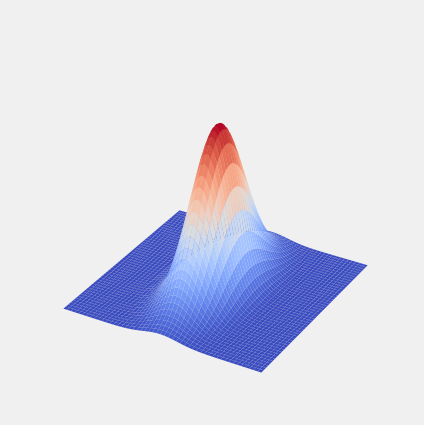

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib import cm

from matplotlib import colormaps
list(colormaps)

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X,Y = np.meshgrid(x,y)

pos = np.array([X.flatten(),Y.flatten()]).T



rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


fig = plt.figure(figsize=(5,5))
ax0 = fig.add_subplot(111, projection='3d')
ax0.plot_surface(X, Y, rv.pdf(pos).reshape(500,500), cmap=cm.coolwarm,linewidth=0)
ax0.set_axis_off()
plt.savefig('3dgaussian.png', format='pdf', bbox_inches='tight')
plt.show()